<h1>Coursera Andrew NG Machine Learning Course Week 2 in Python</h1>
<p>I am going to implement the programming assignment of this course in Python from scratch. In this exercise, we will implement linear regression and get to see it work on data.</p>

<h3>Importing packages</h3>
<ol>
    <li>Numpy, for vectorized calculations</li>
    <li>Matplotlib, for data visualization</li>
    <li>Pandas, for reading the dataset</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2>Linear regression with one variable</h2>

<h3>Reading the dataset</h3>
<p>In this part, I will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.</p>
<p>The file 'ex1data1.txt' contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.</p>
<p>Using pandas' read_csv() function, we read the dataset and store the resultant DataFrame into the 'dataset' variable. Then, we rename the columns of the DataFrame for my convenience, and print the first 5 entries</p>

In [2]:
dataset = pd.read_csv('ex1data1.txt', header=None)
dataset.columns = ['Pop', 'Profit']
print(dataset.head())

      Pop   Profit
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


<h3>Plotting the Data</h3>
<p>Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)</p>
<p>Firstly, we will separate our dataset into two parts :</p>
<ol>
    <li>Features (values which act as the independent variables)</li>
    <li>Observations (values which act as the dependent variables)</li>
</ol>
<p>Next, we display a scatter plot between the population (features) and profits (observations) using Matplotlib's scatter() function. To make our plot more informative, we add labels on both x-axis and y-axis as well as a title.</p>

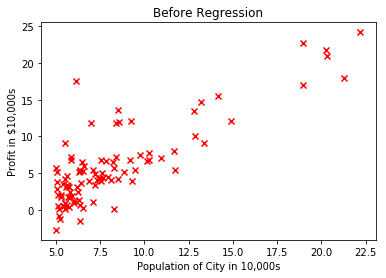

In [3]:
features = dataset['Pop']
observations = dataset['Profit']

plt.scatter(features, observations, color="red", marker="x")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Before Regression')
plt.show()

<h3>Adding 1's to the feature vector</h3>
<p>I'll add another dimension to our data to accommodate the θ0 intercept term so that we can easily do vectorize calculations between 'x' and 'theta'.</p>

In [4]:
features = features.values
observations = observations.values
features = np.column_stack((np.ones(features.shape[0]), features))
print(features.shape)
print(observations.shape)

(97, 2)
(97,)


<h3>Initializing theta parameters</h3>
<p>I'll also initialize the initial theta parameters to 0</p>

In [5]:
theta = np.zeros(features.shape[1])

<h3>Computing the cost function J(θ)</h3>
<p>As we perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.</p>

In [6]:
def cost_function(theta, x, y):
    m = y.shape[0]
    return (1 / (2 * m)) * np.sum((np.dot(x, theta) - y) ** 2)

print(cost_function(theta, features, observations))

32.072733877455676


<h3>Gradient Descent</h3>
<p>In gradient descent, we estimate the parameters in the hypothesis function that leads to minimization of the cost function. In other words, we try to get the optimal values of theta such that our regression line fits the data well.
The way we do this is by taking the derivative (the tangent line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter alpha, which is called the learning rate.</p>

In [7]:
def gradient_descent(theta, x, y, iterations=1500, alpha=0.01):
    m = y.shape[0]
    for _ in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        theta = theta - ((alpha / m) * np.dot(x.T, error))
    return theta

theta = gradient_descent(theta, features, observations)
print(theta)

[-3.63029144  1.16636235]


<h3>Visualizing regression line on our data</h3>
<p>We get the optimal paramters for which the cost function is converged to minimum. Now we use both the parameters so as to visualize how well the regression line fits to our data</p>

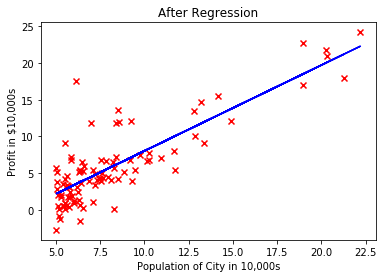

In [8]:
plt.scatter(features[:,1], observations, color="red", marker="x")
plt.plot(features[:,1], theta[0] + theta[1] * features[:,1], color="blue")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('After Regression')
plt.show()

<h2>Linear Regression with multiple variables</h2>

<h3>Advanced optimization library</h3>
<p>Now, we can optimize the theta values more faster compared to our custom implementation. We borrow that functionality from Scipy library. This library contains various advance optimization algorithms under the 'optimize' submodule.</p>

In [9]:
from scipy.optimize import fmin_tnc

<h3>Reading the dataset</h3>
<p>I will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.</p>
<p>The file 'ex1data2.txt' contains a training set of housing prices in Port- land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.</p>
<p>Using pandas' read_csv() function, we read the dataset and store the resultant DataFrame into the 'dataset' variable. Then, we rename the columns of the DataFrame for my convenience, and print the first 5 entries</p>

In [10]:
dataset = pd.read_csv('ex1data2.txt', header=None)
dataset.columns = ['Size', 'Bedrooms', 'Price']
print(dataset.head())

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


<h3>Dividing the dataset</h3>
<p>We will separate our dataset into two parts :</p>
<ol>
    <li>Features {<b>Size</b> and <b>Bedrooms</b>} -> (values which act as the independent variables)</li>
    <li>Observations {<b>Price</b>} -> (values which act as the dependent variables)</li>
</ol>

In [11]:
features = dataset[['Size', 'Bedrooms']].values
observations = dataset['Price'].values
print(features.shape)
print(observations.shape)

(47, 2)
(47,)


<h3>Adding 1's to the feature matrix</h3>
<p>We add ones to the feature index 0 for all training examples as this allows us to do matrix operations with theta and x. Hence, making the two vectors 'theta' and 'x(i)' match each other element-wise i.e have the same number of elements.</p>

In [12]:
features = np.column_stack((np.ones(features.shape[0]), features))
print(features.shape)

(47, 3)


<h3>Plotting the data</h3>
<p>Using Matplotlib, we will make a scatter plot between the size of the houses and the corresponding price of the houses</p>

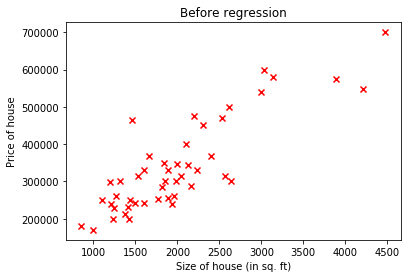

In [13]:
plt.scatter(features[:,1], observations, color="red", marker="x")
plt.xlabel('Size of house (in sq. ft)')
plt.ylabel('Price of house')
plt.title('Before regression')
plt.show()

<h3>Initializing theta parameters</h3>
<p>I'll initialize the initial theta parameters to 0</p>

In [14]:
theta = np.zeros(features.shape[1])
print(theta)

[0. 0. 0.]


<h3>Cost function and gradient</h3>
<p>The objective of linear regression is to minimize our cost function and obtained optimized values of theta parameters that best fit our data. To do that, we create our own user-defined functions wherein :</p>
<ul>
    <li>
        <b>cost_function_multi(theta, x, y)</b> :<br>
        This function calculates the value of cost function for ith training example parameterized by theta
    </li>
    <li>
        <b>gradient(theta, x, y)</b> :<br>
            This function calculates the partial derivatives of the cost function for ith training example for each theta parameters.
    </li>
</ul>    

In [15]:
def cost_function_multi(theta, x, y):
    m = y.shape[0]
    return (1 / (2 * m)) * np.sum((np.dot(x, theta) - y) ** 2)

def gradient(theta, x, y):
    m = y.shape[0]
    error = np.dot(x, theta) - y
    return (1 / m) * (np.dot(x.T, error))

<h3>Advanced optimization algorithm</h3>
<p>We will be using the 'fmin_tnc() function which takes the following parameters :</p>
<ol>
    <li>func : The name of the user-defined cost function (in our case, cost)</li>
    <li>x0 : Initial values of theta</li>
    <li>fprime : The name of the user-defined gradient function (in our case, gradient)</li>
    <li>args : The tuple consisting of features (x) and labels (y)</li>
</ol>
<p>To speed up calculations for gradient descent, this function will make each of the feature values in roughly the same range. This can be done by calculating the z-score of each feature value. This technique is known as <b>feature normalization.</b></p>

In [16]:
def fit(x, y, theta):
    theta = fmin_tnc(func=cost_function_multi, x0=theta, fprime=gradient, args=(x,y))
    return theta[0]

theta = fit(features, observations, theta)
print(theta)

[5663.17565769  151.87998841 8181.64611107]


<h3>Visualizing regression line on our data</h3>
<p>To visualize the regression line on the scatter plot we plotted earlier, we require the intercept (theta[0]) and theta[1] parameters which are obtained after advanced optimization</p>
<p>These theta parameters are put in equation y = mx + c to obtained the line plot</p>

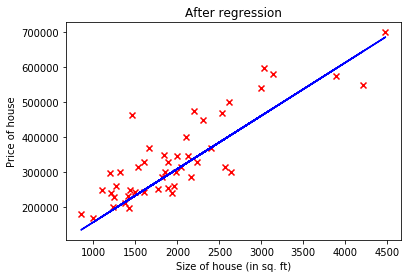

In [17]:
plt.scatter(features[:,1], observations, color="red", marker="x")
plt.plot(features[:,1], theta[0] + theta[1] * features[:,1], color="blue")
plt.xlabel('Size of house (in sq. ft)')
plt.ylabel('Price of house')
plt.title('After regression')
plt.show()

<h2>Linear regression using Normal Equation</h2>

<h3>Normal Equation</h3>
<p>Gradient descent gives us one way of minimizing the cost function. There's a second way of doing so, this time performing the minimization explicitly without resorting to an iterative algorithm.
In the "Normal Equation" method, we will minimize the cost function by explicitly taking the derivatives with respect to the theta and setting them to 0.</p>
<p>This allows us to find the optimum theta without iteration. The normal equation formula is given below</p>
<br>theta = (X<sup>T</sup>.X)<sup>-1</sup>.X<sup>T</sup>.y</br>
<p>There is <b>no need to do feature normalization</b> with the normal equation</p>
<p>With the normal equation, computing the inverse has the time complexity O(n3). So if we have a very large number of features, the normal equation will be slow. In practice, when number of features exceeds 10,000 it might be a good time to go from normal equation to an iterative process like gradient descent.</p>

In [18]:
def normal_equation(x, y):
    return np.dot(np.linalg.inv(np.dot(x.T, x)),np.dot(x.T, y))

theta = normal_equation(features, observations)
print(theta)

[89597.9095428    139.21067402 -8738.01911233]


<h3>Visualizing regression line on our data</h3>
<pT>o visualize the regression line on the scatter plot we plotted earlier, we require the intercept (theta[0]) and theta[1] parameters which are obtained from the normal equation function.
These theta parameters are put in equation y = mx + c to obtained the line plot</p>

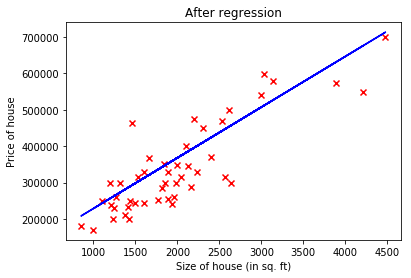

In [19]:
plt.scatter(features[:,1], observations, color="red", marker="x")
plt.plot(features[:,1], theta[0] + theta[1] * features[:,1], color="blue")
plt.xlabel('Size of house (in sq. ft)')
plt.ylabel('Price of house')
plt.title('After regression')
plt.show()